***Jonathan's Individual Analysis Notebook***

The goal of my individual notebook is to use the Parks, City of Pittsburgh Parks, and Neighborhoods datasets to generate a ranking of the neighborhoods of Pittsburgh. This ranking will be based on the percent of land in that neighborhood that is being used for parks.

,nbhd_size,total_park_area,percent_park_area
nbhd_name,,,
Squirrel Hill South,1717.485,1042.875955,60.721110
Highland Park,747.691,383.018646,51.226863
Allegheny Center,134.703,63.911119,47.445951
Beltzhoover,270.374,80.150916,29.644461
Allentown,189.608,32.919514,17.361880
...,...,...,...
New Homestead,510.728,0.468682,0.091768
Esplen,147.829,0.132588,0.089690
North Oakland,320.679,0.258574,0.080633


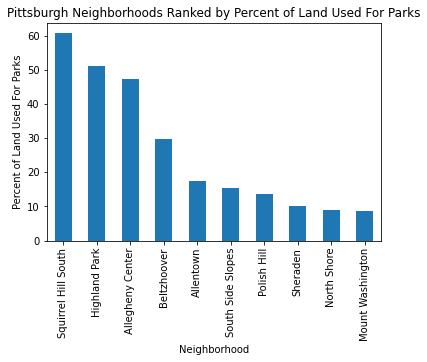

In [48]:
import pandas as pd

# creating dataframe for each of the datasets used in this analysis
parks_area = pd.read_table("Parks.csv", sep = ",")
parks_nbhd = pd.read_table("ParksNeighborhoods.csv", sep = ",")
nbhd_sizes = pd.read_table("NeighborhoodSizes.csv", sep = ",")


# a bunch of dictionaries used to connect information between datasets

parks_dict = {
    # contains park -> neighborhood
}

parksize_dict = {
    # contains park -> size
}

size_dict = {
    # contains neighborhood -> total park area
}

nbhd_size_dict = {
    # contains neighborhood -> neighborhood area
}


# dictionary used to create the dataframe for analysis
nbhd_dict = {
    "nbhd_name": [],
    "nbhd_size": [],
    "total_park_area": [],
    "percent_park_area": []
}



# looping through ParksNeighborhoods.csv to create dictionary with the neighborhood each park is located in
for index, row in parks_nbhd.iterrows():
    parks_dict[row["name"]] = row["neighborhood"]
    
    
# looping through Parks.csv to create dictionary with each park's individual size
for index, row in parks_area.iterrows():       
    parksize_dict[row["updatepknm"]] = row["acreage"]

    
# using neighborhoods associated with park names from parks_dict to create dictionary with each neighborhoods total park area
for park in parks_dict:
    if park in parks_dict and park in parksize_dict:
        if parks_dict[park] in size_dict:
            size_dict[parks_dict[park]] += parksize_dict[park]
        else:
            size_dict[parks_dict[park]] = parksize_dict[park]

            
# looping through NeighborhoodSizes.csv to create dictionary with each neighborhood's size in acres
for index, row in nbhd_sizes.iterrows():
    if row["hood"] in size_dict:
        nbhd_size_dict[row["hood"]] = row["acres"]
            
            
# using all the dictionaries to create a cohesive dictionary to make a dataframe out of            
for neighborhood in size_dict:
    nbhd_dict["nbhd_name"].append(neighborhood)
    nbhd_dict["nbhd_size"].append(nbhd_size_dict[neighborhood])
    nbhd_dict["total_park_area"].append(size_dict[neighborhood])        
    if nbhd_size_dict[neighborhood] != 0:
        nbhd_dict["percent_park_area"].append(size_dict[neighborhood] / nbhd_size_dict[neighborhood] * 100)
    else:
        nbhd_dict["percent_park_area"].append(0)       

        
# now have all necessary info to make a dataframe using nbhd_dict
data = pd.DataFrame(nbhd_dict)
data = data.set_index("nbhd_name")
data = data.sort_values(by = ["percent_park_area"], ascending = False)


display(data.head(70))
#print(data.to_string()) #to show full dataframe

display(data["percent_park_area"].head(10).plot(kind = "bar", ylabel = "Percent of Land Used For Parks", xlabel = "Neighborhood", title = "Pittsburgh Neighborhoods Ranked by Percent of Land Used For Parks"))


**Conclusion**

It was found through the use of the Parks, City of Pittsburgh Parks, and Neighborhoods datasets that the neighborhood with the highest percent of its land being used for a public park is Squirrel Hill South. This neighborhood has an impressive 60.72% of its acreage being used to provide parks to its residents. This submetric of ranking each Pittsburgh neighborhood by percent park usage will be further utilized towards deciding which neighborhood in Pittsbugh is ultimately the best.